# **Inferencia estadística**
#IE03. Graficando distribuciones de probabilidades



## <font color='blue'>__Bibliografía__</font>
* Estadística para Administración y Economía. Paul Newbold, William L. Carlson y Betty Thorne, 2013.

* Estadística Aplicada a los Negocios y la Economía. Allen L. Webster, 2000.

* Fundamentos de Estadística. Peña Sánchez de Rivera, Daniel, 2008.

## <font color='blue'>__Lecturas__</font>

* López-Briega, R. (2016). Distribuciones de probabilidad con Python.

* Davis, S., Fard, N. (2020). Theoretical bounds and approximation of the probability mass function of future hospital bed demand. Health Care Manag Sci 23, 20–33.

Nota: Los contenios de este notebook están basados en el trabajo de Raúl E. López Briega. El contenido esta bajo la licencia BSD de Raúl E. López Briega.

<font color='red'>Nota:</font> Este contenido será deconstruído en una ayudantía para su mejor comprensión.

## <font color='blue'>**Graficando distribuciones**</font>

### <font color='blue'>**Histogramas**</font>

Una de las mejores maneras de describir una variable discreta es representar los valores que aparecen en el conjunto de datos y el número de veces que aparece cada valor. La representación más común de una distribución es un [histograma](https://es.wikipedia.org/wiki/Histograma), el cual es un gráfico que muestra la frecuencia de cada valor.

En Python, podemos graficar fácilmente un histograma con la ayuda de la función `hist` de `matplotlib`, simplemente debemos pasarle los datos y la cantidad de *contenedores* (_bins_) en los que queremos dividirlos. Por ejemplo, podríamos graficar el histograma de una distribución normal del siguiente modo.

In [ ]:
# importando módulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

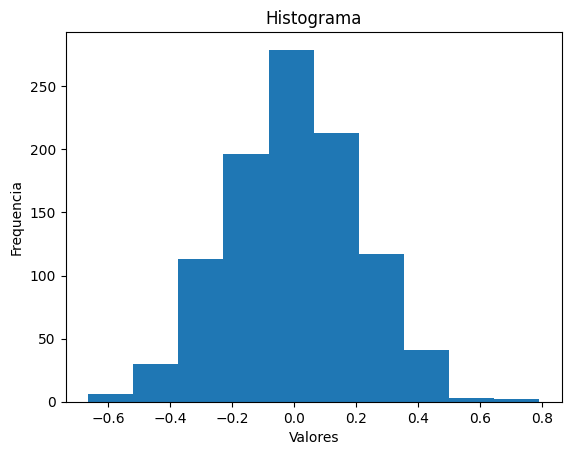

In [ ]:
# Graficando histograma
mu, sigma = 0, 0.2 # media y desviación estándar
# Definimos una semilla para poder replicar el experimento con los mismos valores
datos = np.random.RandomState(seed=18).normal(mu, sigma, 1000) #creando muestra de datos

# histograma de distribución normal.
frecuencias, bins, ignorar = plt.hist(datos, 10, cumulative=False)

plt.ylabel('Frequencia')
plt.xlabel('Valores')
plt.title('Histograma')
plt.show()

#

In [ ]:
print(frecuencias)
print(bins)
print(type(ignorar))

[  6.  30. 113. 196. 279. 213. 117.  41.   3.   2.]
[-0.66354832 -0.51824362 -0.37293892 -0.22763422 -0.08232952  0.06297518
  0.20827987  0.35358457  0.49888927  0.64419397  0.78949867]
<class 'matplotlib.container.BarContainer'>


### <font color='blue'>**Función de Masa de Probabilidad**</font>


Otra forma de representar a las distribuciones discretas es utilizando su [Función de Masa de Probabilidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_probabilidad) o FMP (**pmf**, *probability mass function*, en inglés), la cual relaciona cada valor con su **probabilidad** en lugar de su **frecuencia** como vimos anteriormente. Esta función es *normalizada* de forma tal que el valor total de probabilidad sea 1.

<br>
<img src="https://drive.google.com/uc?export=view&id=1wVwyAICBtSH_nnQzhQ7_fIf5Ng-Wl_Vr" width="450">


<br>

Créditos:  Oleg Alexandrov - Trabajo propio, [Dominio público](https://commons.wikimedia.org/w/index.php?curid=2073424).

La ventaja que nos ofrece utilizar la FMP es que podemos comparar dos distribuciones sin necesidad de ser confundidos por las diferencias en el tamaño de las muestras. También debemos tener en cuenta que FMP funciona bien si el número de valores es pequeño; pero a medida que el número de valores aumenta, la probabilidad asociada a cada valor se hace cada vez más pequeña y el efecto del **ruido aleatorio** aumenta.
Veamos un ejemplo.

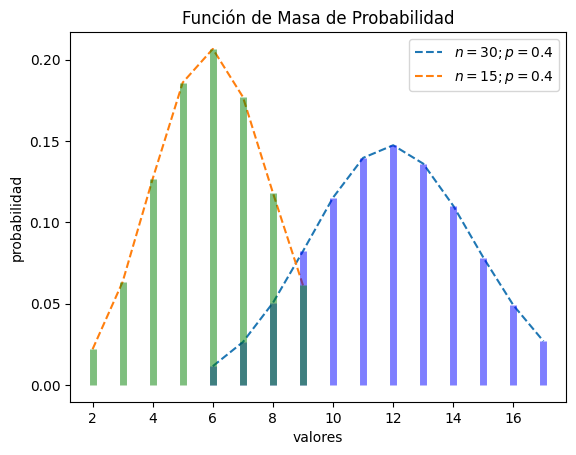

In [ ]:
# Graficando FMP
# Asumamos que tenemos un proceso de fabricación que genera un 40% de productos
# defectuosos.
# Si entregamos en lotes de 30 unidades, veamos la distribución de probabilidad de
# productos defectuosos para el lote.
n, p = 30, 0.4 # parámetros de forma de la distribución binomial

# Veamos el caso en el que reducimos el lote a la mitad
n_1, p_1 = 15, 0.4 # parámetros de forma de la distribución binomial
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
x_1 = np.arange(stats.binom.ppf(0.01, n_1, p_1),
              stats.binom.ppf(0.99, n_1, p_1))
fmp = stats.binom.pmf(x, n, p) # Función de Masa de Probabilidad
fmp_1 = stats.binom.pmf(x_1, n_1, p_1) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--', label="$n=30; p=0.4$")
plt.plot(x_1, fmp_1,  '--', label="$n=15; p=0.4$")
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.vlines(x_1, 0, fmp_1, colors='g', lw=5, alpha=0.5)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend()
plt.show()

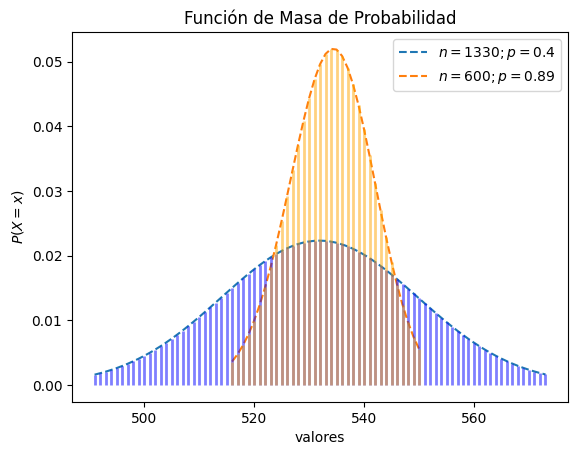

In [ ]:
# Caso en el que n aumenta. La probabilidad de cada evento disminuye considerablemente
#crearemos 2 dist. binomial, con similar medial, pero diferentes niveles de dispersión (variabilidad)

n, p = 1330, 0.4 # parámetros de forma de la distribución binomial con mayor dispersión
n_1, p_1 = 600, 0.89 #binomial con menor dispersión

# crear valores
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))

x_1 = np.arange(stats.binom.ppf(0.01, n_1, p_1),
              stats.binom.ppf(0.99, n_1, p_1))
# calcular fmp
fmp = stats.binom.pmf(x, n, p) # Función de Masa de Probabilidad
fmp_1 = stats.binom.pmf(x_1, n_1, p_1)
#graficar
plt.plot(x, fmp, '--', label="$n={}; p=0.4$".format(n))
plt.plot(x_1, fmp_1,  '--', label="$n={}; p=0.89$".format(n_1))
plt.vlines(x, 0, fmp, colors='b', lw=2, alpha=0.5)
plt.vlines(x_1, 0, fmp_1, colors='orange', lw=2, alpha=0.5)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('$P(X=x)$')
plt.xlabel('valores')
plt.legend()
plt.show()

### <font color='blue'>**Función de Distribución Acumulada**</font>

Si queremos evitar los problemas que se generan con la FMP cuando el número de valores es muy grande, podemos recurrir a utilizar la [Función de Distribución Acumulada](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n) o **FDA** (**cdf**, *cumulative distribution function*, en inglés), para representar a nuestras distribuciones, tanto **discretas** como **continuas**. Esta función relaciona los valores con su correspondiente [percentil](https://es.wikipedia.org/wiki/Percentil); es decir, que va a describir la probabilidad de que una variable aleatoria $X$ sujeta a cierta ley de distribución de probabilidad se sitúe en la zona de valores menores o iguales a x.

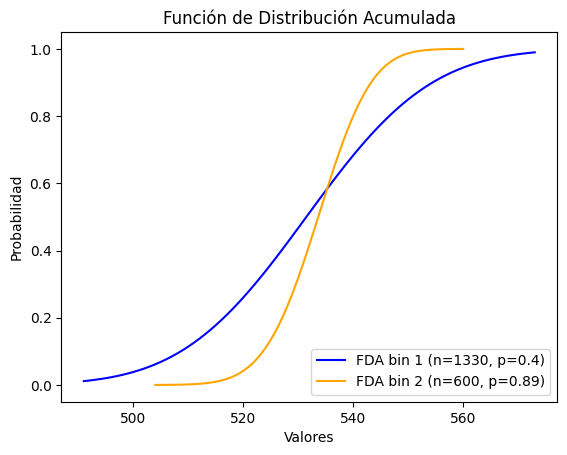

sigma (teórico) Bin1: 17.866169147301836
sigma Bin1: 19.383900536269785
sigma (teórico) Bin2: 7.664202502543888


In [ ]:
# Graficando Función de Distribución Acumulada con Python
# Caso en el que n aumenta. La probabilidad de cada evento disminuye considerablemente
n, p = 1330, 0.4 # parámetros de forma de la distribución binomial con mayor dispersión
n_1, p_1 = 600, 0.89 #binomial con menor dispersión

# crear valores
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))

x_1 = np.arange(stats.binom.ppf(0.0001, n_1, p_1),
              stats.binom.ppf(0.9999, n_1, p_1))

#calcular probabilidad acumulada
fda_binom = stats.binom.cdf(x, n, p) # Función de Distribución Acumulada
fda_binom_1 = stats.binom.cdf(x_1, n_1, p_1) # Función de Distribución Acumulada
#graficar
plt.plot(x, fda_binom, color='b', label='FDA bin 1 (n=1330, p=0.4)')
plt.plot(x_1, fda_binom_1, color='orange', label='FDA bin 2 (n=600, p=0.89)')
plt.title('Función de Distribución Acumulada')
plt.ylabel('Probabilidad')
plt.xlabel('Valores')
plt.legend(loc=4)
plt.show()
#calcular desv. estandar
print('sigma (teórico) Bin1:', np.sqrt(n*p*(1-p)))#leer sobre media y sigma en dist. binomila
print('sigma Bin1:', np.std(stats.binom.rvs(n, p, size=100)))#muestra n=100
print('sigma (teórico) Bin2:', np.sqrt(n_1*p_1*(1-p_1)))

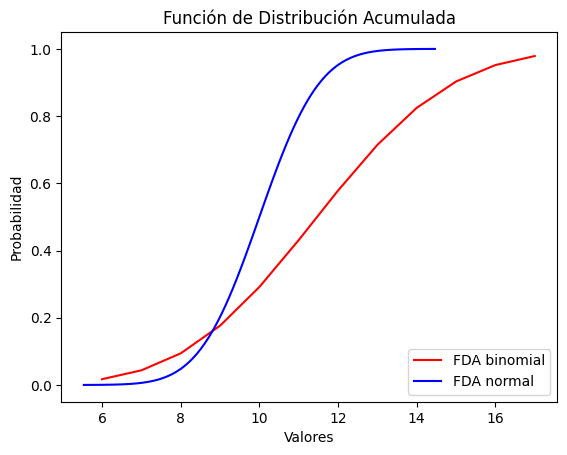

In [ ]:
# Comparando distribuciones discretas y continuas

#discreta - binomial
n, p = 30, 0.4
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
#continua - normal
mu, sigma = 10, 1.2
x_1 = np.linspace(stats.norm(mu, sigma).ppf(0.0001),
                  stats.norm(mu, sigma).ppf(0.9999), 100)
#calcular probabilidad acumulada
fda_binom = stats.binom.cdf(x, n, p) # Función de Distribución Acumulada
fda_normal = stats.norm(10, 1.2).cdf(x_1) # Función de Distribución Acumulada
plt.plot(x, fda_binom, color='r', label='FDA binomial')
plt.plot(x_1, fda_normal, color='b', label='FDA normal')
plt.title('Función de Distribución Acumulada')
plt.ylabel('Probabilidad')
plt.xlabel('Valores')
plt.legend(loc=4)
plt.show()

### <font color='blue'>**Función de Densidad de Probabilidad**</font>

Por último, el equivalente a la __FMP__ para distribuciones __continuas__ es la [Función de Densidad de Probabilidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad) o __FDP__ (**pdf**, *probability density function*, en inglés). Esta función es la derivada de la Función de Distribución Acumulada.

Por ejemplo, para la distribución normal que graficamos anteriormente, su FDP es la típica forma de campana que caracteriza a esta distribución.

<br>
<img src="https://drive.google.com/uc?export=view&id=1mxVTXd2QYYqDhZ5nbSJg7bnIJXS0lniv" width='500'>
<br>

Créditos imágen: De Ainali - Trabajo propio, [CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=3141713)


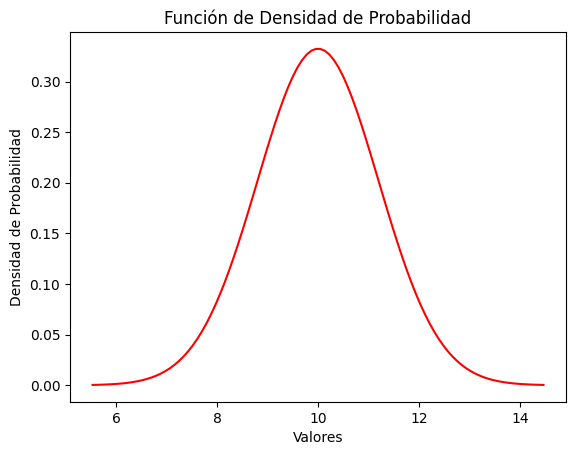

In [ ]:
# Graficando Función de Densidad de Probibilidad con Python
#continua - normal
mu, sigma = 10, 1.2
x_1 = np.linspace(stats.norm(mu, sigma).ppf(0.0001),
                  stats.norm(mu, sigma).ppf(0.9999), 100)

#función densidad de probabilidad
FDP_normal = stats.norm(10, 1.2).pdf(x_1) # FDP
plt.plot(x_1, FDP_normal, color='r', label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('Densidad de Probabilidad')
plt.xlabel('Valores')
plt.show()